In [1]:
import numpy as np
import pylab as p
import matplotlib as mpl
import matplotlib.pyplot  as  plt
import matplotlib.cm as cm

import math
import itertools 

np.set_printoptions(linewidth = 130, precision = 13)
%matplotlib inline

from scipy.optimize import fsolve
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from matplotlib import colors
from matplotlib import pyplot

In [2]:
def fitness(del_b, del_nu): #gamma_ij = min{gamma_i, gamma_j}, k_{ij} = k
    mu = 1/(k*(R0 - 1))
    
    #lambda^2_1 + lambda^1_2
    lambd21 =  R0/2*(2*mu**2 + 3*mu + 2)/((mu + 1)**2)*del_nu + del_b
    lambd12 = -R0/2*(2*mu**2 +   mu    )/((mu + 1)**2)*del_nu - del_b
    
    return lambd21, lambd12

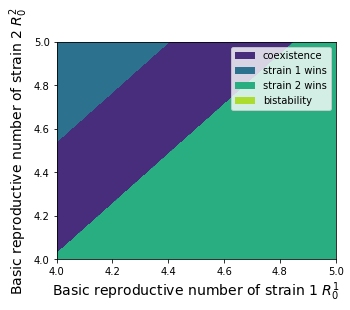

In [8]:
# neutral parameters
k = 3
m = 1.5
beta = 6
eps = 0.1
R0 = beta/m

v1 = -1
v2 = 1
del_nu = v2 - v1

#matrices X: R_01, Y: R_02
X = np.linspace(4, 5, 1000)
Y = np.linspace(4, 5, 1000)
x, y = np.meshgrid(X, Y)
t = len(X)

# compute matrix of delta b
delb_arr = np.zeros((t,t))

for i in range (0, t):
    for j in range (0, t):
        b1 = -beta/eps + X[i]*(m/eps + v1)
        b2 = -beta/eps + Y[j]*(m/eps + v2)
        delb_arr[i,j] = b1 - b2


L21, L12  = fitness(delb_arr, del_nu)

#matrix positive and negative for fitness of each strain
pos1 = L21 > 0
pos2 = L12 > 0
neg1 = L21 < 0
neg2 = L12 < 0

#matrix of scenarios
coex = (-10)*pos1*pos2
s1 = -2*pos1*neg2
s2 =  2*neg1*pos2
bista =   10*neg1*neg2
scen = coex + s1 + s2 + bista

plt.figure(figsize = (5, 4))
f1 =plt.contourf(x, y, scen, levels = [-10,-5, 0, 5,10])
plt.ylabel('Basic reproductive number of strain 2 $R^2_0$', fontsize = 14)
plt.xlabel('Basic reproductive number of strain 1 $R^1_0$', fontsize = 14)
proxy = [plt.Rectangle((0,0),1,1, fc = pc.get_facecolor()[0]) for pc in f1.collections]
plt.legend(proxy, ["coexistence", "strain 1 wins", "strain 2 wins", "bistability"])
#plt.savefig('3.5.jpg')

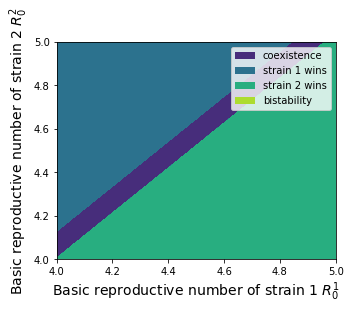

In [9]:
# neutral parameters
k = 3
m = 1.5
beta = 6
eps = 0.1
R0 = beta/m

v1 = -0.25
v2 = 0.25
del_nu = v2 - v1

#matrices X: R_01, Y: R_02
X = np.linspace(4, 5, 1000)
Y = np.linspace(4, 5, 1000)
x, y = np.meshgrid(X, Y)
t = len(X)

# compute matrix of delta b
delb_arr = np.zeros((t,t))

for i in range (0, t):
    for j in range (0, t):
        b1 = -beta/eps + X[i]*(m/eps + v1)
        b2 = -beta/eps + Y[j]*(m/eps + v2)
        delb_arr[i,j] = b1 - b2


L21, L12  = fitness(delb_arr, del_nu)

#matrix positive and negative for fitness of each strain
pos1 = L21 > 0
pos2 = L12 > 0
neg1 = L21 < 0
neg2 = L12 < 0

#matrix of scenarios
coex = (-10)*pos1*pos2
s1 = -2*pos1*neg2
s2 =  2*neg1*pos2
bista =   10*neg1*neg2
scen = coex + s1 + s2 + bista

plt.figure(figsize = (5, 4))
f1 =plt.contourf(x, y, scen, levels = [-10,-5, 0, 5,10])
plt.ylabel('Basic reproductive number of strain 2 $R^2_0$', fontsize = 14)
plt.xlabel('Basic reproductive number of strain 1 $R^1_0$', fontsize = 14)
proxy = [plt.Rectangle((0,0),1,1, fc = pc.get_facecolor()[0]) for pc in f1.collections]
plt.legend(proxy, ["coexistence", "strain 1 wins", "strain 2 wins", "bistability"])
#plt.savefig('3.5.jpg')